# Unit 4: Covariance, Correlation and Regression

## 1 Covariance estimation 协变量<br>
$cov_s(x,y)=\frac{\sum(x_i-\bar{x})(y_i-\bar{y})}{n-1}$


In [1]:
### using the numpy.cov 
import numpy as np
data= np.array([[3, 2], [1, 5], [2, 7],[4,5]])
print(data)

[[3 2]
 [1 5]
 [2 7]
 [4 5]]


In [2]:
#each row is treated a variable，row=true 时，是把每一行作为一个变量，再来计算变量间的协方差。
# 这样我们就有4个变量，出来结果应该是个4x4的矩阵，计算两两之间的协方差
print(np.cov(data,rowvar=True,ddof=1))

#each column is treated a variable，row=true 时，是把每一列作为一个变量，再来计算变量间的协方差
# 这样我们就有2个变量，出来结果应该是个2x2的矩阵，计算两两之间的协方差
print(np.cov(data,rowvar=False,ddof=1))

[[ 0.5 -2.  -2.5 -0.5]
 [-2.   8.  10.   2. ]
 [-2.5 10.  12.5  2.5]
 [-0.5  2.   2.5  0.5]]
[[ 1.66666667 -0.83333333]
 [-0.83333333  4.25      ]]


In [11]:
#我们还可以把变量提出来，放到数据列表格式里去计算
### verifying the diagnonals are variances: 
dr1=data.T[0]
dr2=data.T[1]

print(np.var(dr1,ddof=1))
print(np.var(dr2,ddof=1))

1.6666666666666667
4.25


In [4]:
?np.cov   #查看指令

Signature:
np.cov(
    m,
    y=None,
    rowvar=True,
    bias=False,
    ddof=None,
    fweights=None,
    aweights=None,
    *,
    dtype=None,
)
Docstring:
Estimate a covariance matrix, given data and weights.

Covariance indicates the level to which two variables vary together.
If we examine N-dimensional samples, :math:`X = [x_1, x_2, ... x_N]^T`,
then the covariance matrix element :math:`C_{ij}` is the covariance of
:math:`x_i` and :math:`x_j`. The element :math:`C_{ii}` is the variance
of :math:`x_i`.

See the notes for an outline of the algorithm.

Parameters
----------
m : array_like
    A 1-D or 2-D array containing multiple variables and observations.
    Each row of `m` represents a variable, and each column a single
    observation of all those variables. Also see `rowvar` below.
y : array_like, optional
    An additional set of variables and observations. `y` has the same form
    as that of `m`.
rowvar : bool, optional
    If `rowvar` is True (default), then each row re

## 2 Correlation coefficient
### 2.1. Pearson's r   

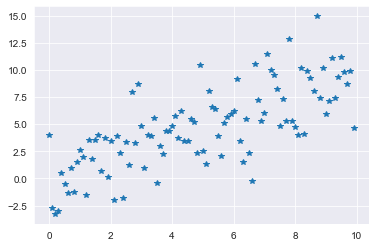

Pearson's correlation coefficient is:  0.7277471405370615 and the 2-tailed p-value is:  9.764291298148432e-18


In [2]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

x =np.arange(0,10,0.1)
# 设一个变量取用随机值来仿真数据
# 如果加大仿真值的系数0.5到5，试试看结果。
y =x + 0.5*np.random.normal(loc=0,scale=5,size=100)

plt.plot(x,y,"*")
plt.show()
#scipy pearson r, and p values
r,p=stats.pearsonr(x,y)
print("Pearson's correlation coefficient is: ", r,  "and the 2-tailed p-value is: ",p)

### numpy correlation coefficients
#r=np.corrcoef(x,y)
#print("Pearson's correlation coefficient btw x and y is :", r[0][1])



###  2.2 spearman's $\rho$, : for two ordinal variables, or  ratio/scale data of non-normal distribution

In [14]:
import scipy.stats as stats
import numpy as np
np.random.seed(100)
x =np.arange(0,10,0.1)
y =x+10*stats.uniform.rvs(loc=0,scale=10,size=100)


print(stats.spearmanr(x,y))
print(stats.pearsonr(x,y))

SpearmanrResult(correlation=0.1358295829582958, pvalue=0.17782803728611013)
(0.12500584915771518, 0.2152679254988894)


### 2.3. Kendall's $\tau$: for two ordinal variables

In [15]:
x=np.array([7, 8, 4, 5.5, 4.5, 4, 5, 3, 2, 0.5, 1])
y=np.array([4, 2, 5, 0.5, 1.5, 2, 0, 1, 0, 1.5, 0])

print(stats.kendalltau(x,y))
print(stats.spearmanr(x,y))
print(stats.pearsonr(x,y))

KendalltauResult(correlation=0.2501851166488378, pvalue=0.3016793558075872)
SpearmanrResult(correlation=0.3579915357347819, pvalue=0.27970362478978855)
(0.37666305382827525, 0.25352957176912916)


同样的数据，一般来说 Kendall的值会比Spearman算出来要小，Spearman 的数值幅度会大点，鲁棒性差点

In [4]:
?stats.kendalltau

Signature:
stats.kendalltau(
    x,
    y,
    initial_lexsort=None,
    nan_policy='propagate',
    method='auto',
    variant='b',
)
Docstring:
Calculate Kendall's tau, a correlation measure for ordinal data.

Kendall's tau is a measure of the correspondence between two rankings.
Values close to 1 indicate strong agreement, and values close to -1
indicate strong disagreement. This implements two variants of Kendall's
tau: tau-b (the default) and tau-c (also known as Stuart's tau-c). These
differ only in how they are normalized to lie within the range -1 to 1;
the hypothesis tests (their p-values) are identical. Kendall's original
tau-a is not implemented separately because both tau-b and tau-c reduce
to tau-a in the absence of ties.

Parameters
----------
x, y : array_like
    Arrays of rankings, of the same shape. If arrays are not 1-D, they
    will be flattened to 1-D.
initial_lexsort : bool, optional
    Unused (deprecated).
nan_policy : {'propagate', 'raise', 'omit'}, optional
 

## 接下来，我们展示下如何对一组数据里的多个变量同时间进行两两相关系数计算

### 用 pandas 的函数还计算 相关系数

In [16]:
import numpy as np
import pandas as pd

SuicideRate = pd.read_csv("Data_suicide-rates-overview-1985-to-2016.csv")
SuicideRate.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


#### 每列均为一个变量，我们来计算每两列之间的相关系数

In [6]:
pearsoncorr = SuicideRate.corr(method='pearson')
pearsoncorr

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,1.000000,-0.004546,0.008850,-0.039037,0.366786,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.151399,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.102943,0.081510
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.074279,0.001785
HDI for year,0.366786,0.151399,0.102943,0.074279,1.000000,0.771228
gdp_per_capita ($),0.339134,0.061330,0.081510,0.001785,0.771228,1.000000


我们用heatmap（热图）来展示相关系数，方便查看结果

<AxesSubplot:>

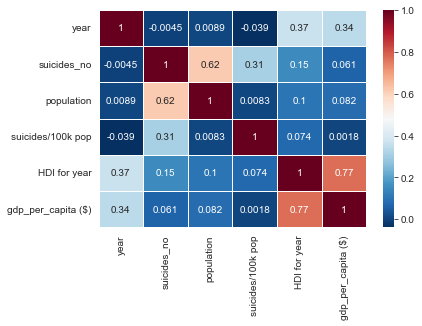

In [7]:
import seaborn as sb

sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

结果解释：
系数越接近1越表示两个变量之间存在非常强的正相关性。

在我们的案例中，栗色显示出非常强的相关性。对角线是变量与它们自身的相关性，因此它们显然为1。

看这个图，我们可以很快看到：
* 人类发展指数（HDI）与人均GDP高度相关。
* 人口与自杀人数也有很强的相关性。这是我们所期望的吗？人口众多将导致自杀人数增加，反之亦然。

### 我们也可以在 pandas.DataFram.corr 里改成用其它的相关系数计算

In [17]:
spearmancorr = SuicideRate.corr(method='spearman')
spearmancorr

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,1.000000,-0.004146,0.014215,-0.029178,0.329094,0.349895
suicides_no,-0.004146,1.000000,0.775580,0.724183,0.184755,0.100735
population,0.014215,0.775580,1.000000,0.215128,0.133076,0.070745
suicides/100k pop,-0.029178,0.724183,0.215128,1.000000,0.152627,0.073063
HDI for year,0.329094,0.184755,0.133076,0.152627,1.000000,0.928608
gdp_per_capita ($),0.349895,0.100735,0.070745,0.073063,0.928608,1.000000


In [9]:
kendallcorr = SuicideRate.corr(method='kendall')
kendallcorr

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,1.000000,-0.002866,0.009748,-0.019777,0.234793,0.240563
suicides_no,-0.002866,1.000000,0.590450,0.550809,0.121828,0.067134
population,0.009748,0.590450,1.000000,0.141212,0.090117,0.047260
suicides/100k pop,-0.019777,0.550809,0.141212,1.000000,0.099305,0.047641
HDI for year,0.234793,0.121828,0.090117,0.099305,1.000000,0.762445
gdp_per_capita ($),0.240563,0.067134,0.047260,0.047641,0.762445,1.000000



## 3 linear regression 线性回归



### 3.1. scipy.stats.linregress 函数， 
slope : slope of the regression line <br>
intercept : intercept of the regression line <br>
r-value : correlation coefficient<br>
p-value : two-sided p-value for a hypothesis test whose null hypothesis is that the slope is zero<br>
stderr : Standard error of the estimate<br>

slope斜率= 0.8842432455669179 
intercept截距= 0.988920635501537 
r-value相关系数= 0.705668584083345 
p-value检验相关系数是否显著= 2.444416244105182e-16 
standard error of the estimate斜率参数的标准误差= 0.08968577491436196
The 0.95 CI of the slope s is 斜率参数的置信区间( 0.7084591267347685 ,  1.0600273643990674 )
The (r,p) by stats.pearsonr (0.7056685840833448, 2.4444162441052974e-16)


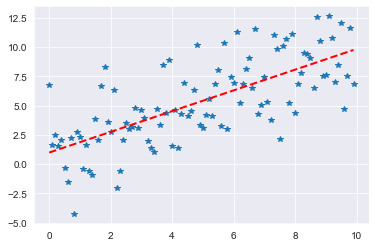

In [4]:
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
np.random.seed(101)
x =np.arange(0,10,0.1)
y =x+0.5*np.random.normal(loc=0,scale=5,size=100)
plt.plot(x,y,"*")

s,itc,r,p,se=linregress(x,y)
y_reg=itc+s*x

plt.plot(x,y_reg,linewidth=2,linestyle="dashed",color="red")
print("slope斜率=",s,"\nintercept截距=",itc,"\nr-value相关系数=",r,"\np-value检验相关系数是否显著=",p,
      "\nstandard error of the estimate斜率参数的标准误差=",se)

print("The 0.95 CI of the slope s is 斜率参数的置信区间(",s-1.96*se, ", ", s+1.96*se,")")

print("The (r,p) by stats.pearsonr", stats.pearsonr(x,y))

### 4.1 plot the regression line, and the CI  -- seaborn.lmplot()
画线性模型的 plot 

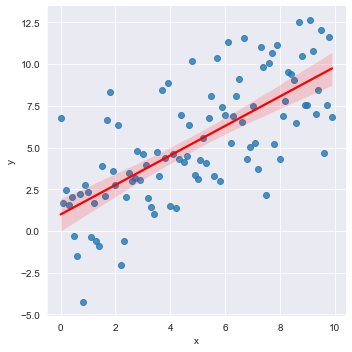

In [11]:
import seaborn as sns
import pandas as pd
sns.set_style("darkgrid")
np.random.seed(101)
x =np.arange(0,10,0.1)
y =x+0.5*np.random.normal(loc=0,scale=5,size=100)

data=pd.DataFrame({"x":x,"y":y})
# 使用 lmplot 可以把两个变量之间的相关性在一张图里画出来，包括了线性回归数值的置信区间（红色区域）
sns.lmplot(x="x", y="y",data=data,ci=95, line_kws={'color': 'red',"alpha":1})

### 4.2. seaborn.regplot()

<AxesSubplot:xlabel='x', ylabel='y'>

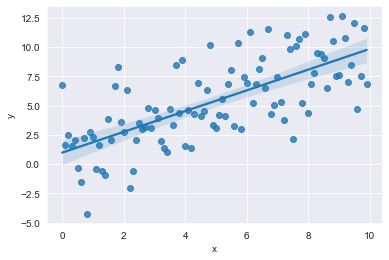

In [12]:
## or using seaborn.regplot，也可以画出置信区间
sns.regplot(x="x", y="y",data=data,ci=95)


## 我们现在来看下怎么用 statsmodels的工具来调用线性回归的函数

## 5. Simple and Multiple Regression with statsmodels.api

要调用里面有个叫“OLS”，就是 ordinary least square（普通最小二乘法）。


In [13]:
import statsmodels.api as sm
np.random.seed(101)
x =np.arange(0,10,0.1) # 输入为 x 变量
y =x+0.5*np.random.normal(loc=0,scale=5,size=100) # y 作为输出，回归模型
X = sm.add_constant(x) ## let's add an intercept (beta_0) to our model 需要加个常数

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)， 需要调用它的一个函数叫 fit 去拟合数据

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     97.21
Date:                Wed, 18 May 2022   Prob (F-statistic):           2.44e-16
Time:                        00:03:53   Log-Likelihood:                -236.01
No. Observations:                 100   AIC:                             476.0
Df Residuals:                      98   BIC:                             481.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9889      0.514      1.924      0.057      -0.031       2.009
x1             0.8842      0.090      9.859      0.000       0.706       1.062
==============================================================================
Omnibus:                        0.889   Durbin-Watson:                   2.154
Prob(Omnibus):                  0.641   Jarque-Bera (JB):                0.974
Skew:                           0.141   Prob(JB):                        0.615
Kurtosis:                       2.608   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
predictions = model.predict(X) # 可以让函数做下预测，输出值
predictions

array([0.98892064, 1.07734496, 1.16576928, 1.25419361, 1.34261793,
       1.43104226, 1.51946658, 1.60789091, 1.69631523, 1.78473956,
       1.87316388, 1.96158821, 2.05001253, 2.13843685, 2.22686118,
       2.3152855 , 2.40370983, 2.49213415, 2.58055848, 2.6689828 ,
       2.75740713, 2.84583145, 2.93425578, 3.0226801 , 3.11110442,
       3.19952875, 3.28795307, 3.3763774 , 3.46480172, 3.55322605,
       3.64165037, 3.7300747 , 3.81849902, 3.90692335, 3.99534767,
       4.08377199, 4.17219632, 4.26062064, 4.34904497, 4.43746929,
       4.52589362, 4.61431794, 4.70274227, 4.79116659, 4.87959092,
       4.96801524, 5.05643957, 5.14486389, 5.23328821, 5.32171254,
       5.41013686, 5.49856119, 5.58698551, 5.67540984, 5.76383416,
       5.85225849, 5.94068281, 6.02910714, 6.11753146, 6.20595578,
       6.29438011, 6.38280443, 6.47122876, 6.55965308, 6.64807741,
       6.73650173, 6.82492606, 6.91335038, 7.00177471, 7.09019903,
       7.17862335, 7.26704768, 7.355472  , 7.44389633, 7.53232

In [15]:
model

### 我们再来看一个更加方便的函数，formula.api，
####  More conveniently , we can use statsmodels.formula.api.ols
可以直接输入公式模式，不需要再额外定义常数，constant

In [16]:
import statsmodels.formula.api as smf
data=pd.DataFrame({"x":x,"y":y})

# 这里就是直接输入公式，公式里的 "=" 号就用“~”来表示，constant 常数会自动加入。
# 一个自变量 y~x, 多个自变量可以写成 y~x+x1+x2
# 和之前的 stasmodel 里的 OLS 函数的差别就是，这里是 smf.ols 小写的 ols, 上面是大写的 OLS
model = smf.ols('y~x', data=data)
results = model.fit()

print(results.params)
print(results.summary())

Intercept    0.988921
x            0.884243
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     97.21
Date:                Wed, 18 May 2022   Prob (F-statistic):           2.44e-16
Time:                        00:04:00   Log-Likelihood:                -236.01
No. Observations:                 100   AIC:                             476.0
Df Residuals:                      98   BIC:                             481.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

#####  Tests the null hypothesis that a sample comes from a normal distribution. It is based on D’Agostino and Pearson’s [1], [2] test that combines skew and kurtosis to produce an omnibus test of normality.

1
D’Agostino, R. B. (1971), “An omnibus test of normality for moderate and large sample size”, Biometrika, 58, 341-348 <br>
2
D’Agostino, R. and Pearson, E. S. (1973), “Tests for departure from normality”, Biometrika, 60, 613-622

In [6]:
### test of residuals Ominibus test
import scipy.stats as stats
### Test the results.resid
z, p = stats.normaltest(results.resid.values) 
print(z,p)  ### corresponding to the Omnibus /Pro in the results.summary
print("skew=",stats.skew(results.resid))
print("kurtosis=",stats.kurtosis(results.resid,fisher=False))

NameError: name 'results' is not defined

#### 
The Durbin Watson (DW) statistic is a test for autocorrelation in the residuals from a statistical regression analysis. The Durbin-Watson statistic will always have a value between 0 and 4. A value of $\color{red}{ 2.0 }$ means that there is no autocorrelation detected in the sample. Values from 0 to less than 2 indicate positive autocorrelation and values from from 2 to 4 indicate negative autocorrelation.


In [18]:
from statsmodels.stats.stattools import durbin_watson
print(durbin_watson(results.resid))

2.1543114484488313


#### 
In statistics, the Jarque–Bera test is a goodness-of-fit test of whether sample data have the skewness and kurtosis matching a normal distribution. The test is named after Carlos Jarque and Anil K. Bera. The test statistic is always nonnegative. If it is far from zero, it signals the data do not have a normal distribution. <br>
#### Jarque–Bera检验是对样本数据是否具有符合正态分布的偏度和峰度的拟合优度的检验

statsmodels.stats.stattools.jarque_bera(resids, axis=0)[source]


In [19]:
from statsmodels.stats.stattools import jarque_bera
JB,JPpv,Skew, Kurt=jarque_bera(results.resid)
print(JB,JPpv,Skew, Kurt)

0.9735723183965785 0.614598445117722 0.14131258243889616 2.6078515936625783


### 我们再来看下多个自变量的线性叠加模型
### An example of multiple linear regression y=b0+b1x+b2x^2

In [20]:
import statsmodels.formula.api as smf
import pandas as pd

# 两个自变量
x1 =np.arange(0,10,0.1)
x2 =np.arange(0,10,0.1)**2

# 加个噪声
noise=0.1*np.random.normal(loc=0,scale=5,size=100)

b0,b1,b2=1.2,2,2.5

# 产生仿真输出值
y = b0+b1*x1+b2*x2+noise

#df=pd.DataFrame({"y":y,"x1":x1,"x2":x2,"x3":x3})
df=pd.DataFrame({"y":y,"x1":x1,"x2":x2})

# 先用上面的仿真数据去模拟个模型，然后进行 fit 来和数量进行拟合
model = smf.ols('y~x1+x2', data=df)
results = model.fit()

print(results.params)
print(results.summary())


Intercept    1.136680
x1           2.039483
x2           2.494913
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.161e+06
Date:                Wed, 18 May 2022   Prob (F-statistic):          4.06e-213
Time:                        00:04:05   Log-Likelihood:                -75.163
No. Observations:                 100   AIC:                             156.3
Df Residuals:                      97   BIC:                             164.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

我们看到模型出来的系数和仿真数据给定的值蛮近似了，如果我们把 noise 改的更小点，系数就更接近了，因为干扰小了。大家可以试试看 变大noise 看看结果. 

## 6. logistic regression for machine learning
### (注意：这部分内容并不作为此课程的核心概念去掌握的)

和线性回归的区别就在于它的输出是个逻辑答案（YES or NO）或是数个类别。

predicting the diabetes from a series of clinical factors. <br>
data from: https://www.kaggle.com/uciml/pima-indians-diabetes-database/data
<br>

Pregnancies: Number of times pregnant<br>
Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test<br>
BloodPressure: Diastolic blood pressure (mm Hg)<br>
SkinThickness: Triceps skin fold thickness (mm)<br>
Insulin: 2-Hour serum insulin (mu U/ml)<br>
BMI: Body mass index (weight in kg/(height in m)2)<br>
DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)<br>
Age: Age (years)<br>
Outcome: Class variable (0 if non-diabetic, 1 if diabetic)<br>

<br>

More details at: https://towardsdatascience.com/end-to-end-data-science-example-predicting-diabetes-with-logistic-regression-db9bc88b4d16


In [21]:
import pandas as pd
data=pd.read_csv("Data_DiseaseDiabetes.csv")
### define the types of variables dependent(or target variable) and independent variable(or feature variables).
#split dataset in features and target variable, in this caase. The dependent variable is "Outcome" (diabesity or not)
#while the independent variables are the rest 'pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree'
feature_cols = data.columns[0:7]
x = data[feature_cols] # Features
y = data.Outcome # Target variable

In [22]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


这是一个千把号人的数据，有怀孕次数，血糖高度，血压，等等生理指标。最后一列是最后判断值，有没有 Outcome 糖尿病（有就是1，没有就是0）。我们希望能建一个回归模型，通过输入这么多的变量/参数 （x1, x2, x3...)，能预测 Outcome (Y) 的值，有没有糖尿病。

(这个是机器学习的原理）

In [23]:
import statsmodels.formula.api as smf
f = 'Outcome ~ Glucose + BloodPressure + Insulin +Pregnancies+SkinThickness+BMI+Age+DiabetesPedigreeFunction' # 因为比较长，所以先用字符串写出来

# 这里用的函数是 “logit"
logitmodel = smf.logit(formula = str(f), data = data).fit()
print(logitmodel.summary())
#print(logitmodel.fittedvalues)

Optimization terminated successfully.
         Current function value: 0.470993
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      759
Method:                           MLE   Df Model:                            8
Date:                Wed, 18 May 2022   Pseudo R-squ.:                  0.2718
Time:                        00:04:09   Log-Likelihood:                -361.72
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 9.652e-54
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -8.4047      0.717    -11.728      0.000      -9.809

### Data Exploration 我们这里仔细点来看下，当你拿到数据后，应该怎么去探索一个数据

可以先做个相关分析，先看下数据中的各个参数间到底是什么关系，两两相关系数

<AxesSubplot:>

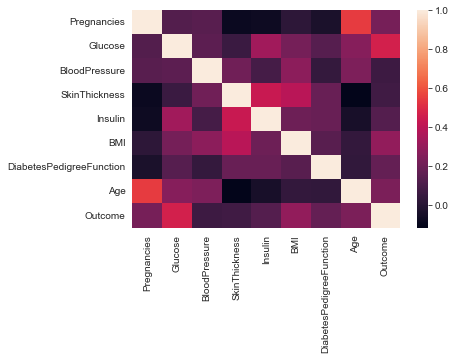

In [24]:
import seaborn as sns

corr = data.corr()
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

In [25]:
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


然后呢，一般在机器学习里，会把拿到的数据分成训练集和测试集。训练集就是说，你拿出一部分数据去搭建你的回归模型，再用另外一部分数据来检验测试你搭建出来模型的准确率有多好。

这边我们调用了 slearn.model_selection 模块里的函数 train_test_split（训练_测试_分割），比如 test_size=0.2 就是取数据的20%来测试，80%去训练。

In [28]:
##Now let's separate the data into training set (80%) and test set (20%) 
### and normalize the data except the Outcome
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2)

###Normalization，因为数据里每个变量的量纲是不一样，有的是体重，有的是血压，有的是年龄，所以需要做个标准化/归一化处理，去掉量纲的影响
# Assuming same lines from your example
cols_to_norm = ["Pregnancies","Glucose","BloodPressure","SkinThickness",
                "Insulin","BMI","DiabetesPedigreeFunction","Age"]
train[cols_to_norm] = train[cols_to_norm].apply(lambda x: (x - x.mean()) / (x.std()))
test[cols_to_norm] = test[cols_to_norm].apply(lambda x: (x - x.mean()) / (x.std()))


C:\Users\zzh19\AppData\Local\Temp/ipykernel_6032/1081954434.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[cols_to_norm] = train[cols_to_norm].apply(lambda x: (x - x.mean()) / (x.std()))
C:\Users\zzh19\AppData\Local\Temp/ipykernel_6032/1081954434.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[cols_to_norm] = test[cols_to_norm].apply(lambda x: (x - x.mean()) / (x.std()))


In [29]:
### modeling the data with training dataset
f = 'Outcome ~ Glucose + BloodPressure + Insulin +Pregnancies+SkinThickness+BMI+Age+DiabetesPedigreeFunction'
logitmodel = smf.logit(formula = str(f), data = train).fit()
print(logitmodel.summary())

Optimization terminated successfully.
         Current function value: 0.474432
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  614
Model:                          Logit   Df Residuals:                      605
Method:                           MLE   Df Model:                            8
Date:                Wed, 18 May 2022   Pseudo R-squ.:                  0.2662
Time:                        00:04:27   Log-Likelihood:                -291.30
converged:                       True   LL-Null:                       -396.97
Covariance Type:            nonrobust   LLR p-value:                 2.593e-41
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.8855      0.109     -8.138      0.000      -1.099

看完模型的结果后，我们还可以把这些系数可视化出来看下。

我们把每个变量在模型里的系数的绝对值展示出来。绝对值越大，说明它在模型中的重要性就越大

Text(0.5, 0, 'Importance')

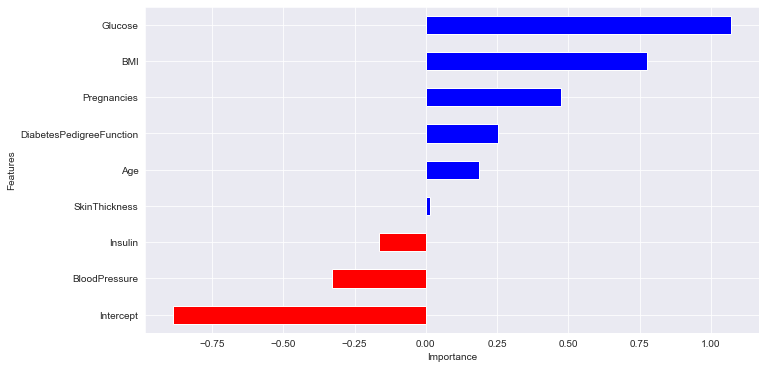

In [30]:
### Interpreting the model 
coeff1 = list(logitmodel.params.values)
labels1 = list(logitmodel.params.index)
coeff = coeff1[0:]
labels = labels1[0:]

features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')


模型出来后，我们来看下到底这个模型对训练集数据的拟合度有多高，如果差的话，那后面压根都不要去在测试集上做了。直接回去换个模型。

怎么看呢，很简单，直接在做出来的模型“logitmodel”后面加个“.pred_table()”来查看训练的结果

In [31]:
## Accuracy for the training data
## confusion matrix
trainingRes=pd.DataFrame(logitmodel.pred_table())
trainingRes.columns=["Predicted Outcome 0","Predicted Outcome 1"]
trainingRes=trainingRes.rename(index={0:"Actual Outcome 0", 1:"Actually Outcome 1"})
trainingRes

,Predicted Outcome 0,Predicted Outcome 1
Actual Outcome 0,353.0,47.0
Actually Outcome 1,90.0,124.0


看结果表的对角线，对角线就是真实和预测一致的数据量，越高，说明拟合的越好。把对角线数字加起来除以总数就是这个模型在训练集上的准确率了

现在，我们来看下这个模型在测试数据上的表现如果？预测的准确率是多高

在模型“logitmodel”后面加“.predict(test)”来查看预测的结果

In [32]:
pred_values = logitmodel.predict(test)
# 用0.5来划分，高于0.5有糖尿病，低于0.5没有糖尿病
bins=np.array([0,0.5,1])

cm = np.histogram2d(test.Outcome, pred_values, bins=bins)[0]
accuracy = (cm[0,0]+cm[1,1])/cm.sum()
print("The prediction accuracy for the test data is :", accuracy)

testRes=pd.DataFrame(cm)
testRes.columns=["Predicted Outcome 0","Predicted Outcome 1"]
testRes=testRes.rename(index={0:"Actual Outcome 0", 1:"Actually Outcome 1"})
testRes

The prediction accuracy for the test data is : 0.7857142857142857


,Predicted Outcome 0,Predicted Outcome 1
Actual Outcome 0,90.0,10.0
Actually Outcome 1,23.0,31.0


可以可视化出来看下模型对预测真实值的效果如何

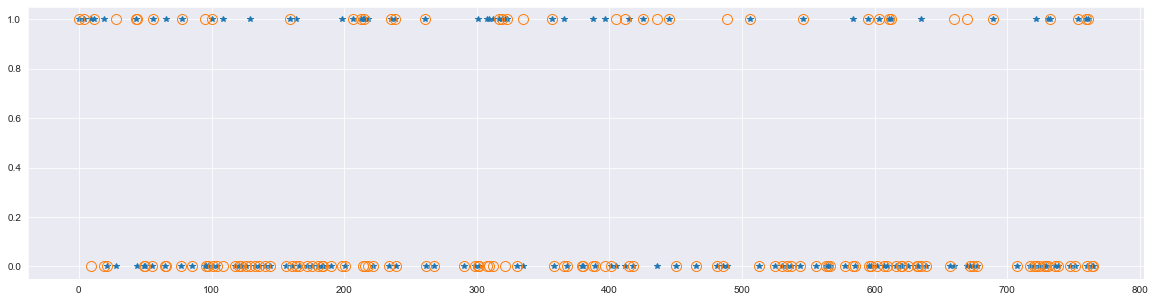

In [33]:
## Now check the test data with the fitted mmodel:
#y_pred=logitmodel.fit().predict(test)

y_pred=logitmodel.predict(test)
sns.set_style("darkgrid")
plt.figure(figsize=(20,5))
plt.plot(test.Outcome,"*")
plt.plot(np.rint(y_pred),"o",mfc="none",ms=10)

#}curacy = logitmodel.
#print("accuracy = ", accuracy * 100, "%")


In [34]:
logitmodel.pred_table(0.5)

array([[353.,  47.],
       [ 90., 124.]])

## Accuracy <br>
you got a classification rate of 80%, considered as good accuracy

## Precision: <br> 
Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In your prediction case, when your Logistic Regression model predicted patients are going to suffer from diabetes, that patients have 76% of the time.

## Recall: <br>
If there are patients who have diabetes in the test set and your Logistic Regression model can identify it 58% of the time.

## ROC Curve <br>
Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.